# Import necessary libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [76]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
features = pd.read_excel(r'C:\Desired Directory\PiotroskyTraining_ClassifierReady.xlsx', header=0, parse_dates=[0])
features = features[features.Fscore > 8]
# features.head()


In [77]:
features = features.dropna()

# Labels are the values we want to predict
labels = np.array(features['Outperform'])
int_labels = labels

In [78]:
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('Outperform', axis=1)
features = features.drop(columns=['Unnamed: 0', 'Quarter Date','Security', 'Name', 'Sector', 'ClosingPrice', 'StartingPrice', 'OneYearPrice', 'TwoYearPrice', 'OneYearReturn', 'TwoYearReturn', 'Underperform'])

feature_list = list(features.columns)

In [79]:

features =features.iloc[np.random.permutation(len(features))]
features = features.reset_index(drop=True)

# Convert to numpy array
features = np.array(features)

In [80]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, int_labels, test_size = 0.1, random_state = 42)

In [81]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (164, 12)
Training Labels Shape: (164,)
Testing Features Shape: (19, 12)
Testing Labels Shape: (19,)


In [82]:

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

In [83]:
# Average CV score on the training set was: 0.5904761904761905
rf = RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.6500000000000001, min_samples_leaf=16, min_samples_split=4, n_estimators=100)

In [84]:
# Train the model on training data
rf.fit(train_features, train_labels);

In [85]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [86]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))

Accuracy: 0.631578947368421


In [87]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: BM                   Importance: 0.52
Variable: BOOK_VAL_PER_SH      Importance: 0.48
Variable: ROA                  Importance: 0.0
Variable: CFO                  Importance: 0.0
Variable: ROA_Change           Importance: 0.0
Variable: Accrual              Importance: 0.0
Variable: LT_Debt_To_Asset_change Importance: 0.0
Variable: Current_Ratio_Change Importance: 0.0
Variable: No_Shares_Change     Importance: 0.0
Variable: Gross_Margin_Change  Importance: 0.0
Variable: Asset_Turnover_Change Importance: 0.0
Variable: Fscore               Importance: 0.0


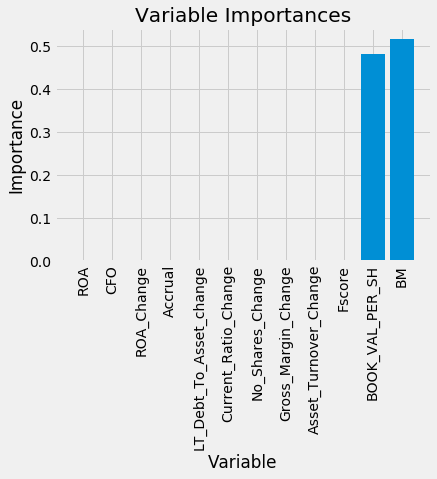

In [88]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

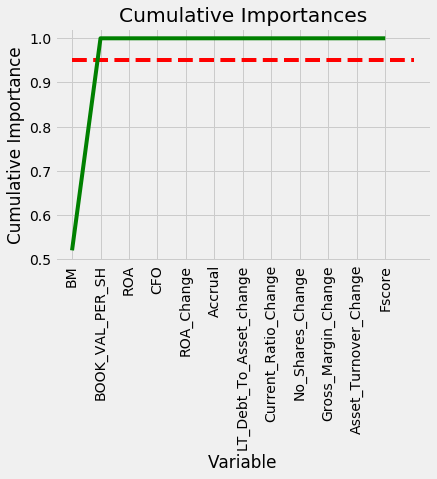

In [89]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [90]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for above 90% importance:', np.where(cumulative_importances > 0.9)[0][0] + 1)

Number of features for above 90% importance: 2


In [91]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:2]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]
# Analyze shape of training and test set
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (164, 2)
Important test features shape: (19, 2)


In [92]:
# Train the expanded model on only the important features
rf.fit(important_train_features, train_labels);
# Make predictions on test data
predictions2 = rf.predict(important_test_features)
# Performance metrics
errors = abs(predictions2 - test_labels)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')


Average absolute error: 0.37 degrees.


In [93]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predictions2))

Accuracy: 0.631578947368421


# Try on Test Data - 2018 Quarterly Data

In [110]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
Test = pd.read_excel(r'C:\Users\calomeri\OneDrive - ICMA-RC\Documents\Capstone\Model_V5\FullTestSet\ClassifierReady\PiotroskyTest_ClassifierReady.xlsx', header=0, parse_dates=[0])
Test = Test[Test.Fscore > 8]
Test = Test[['Outperform','BOOK_VAL_PER_SH', 'BM']]


In [111]:
# whatsgood = whatsgood.replace([np.inf, -np.inf], np.nan)
Test = Test.dropna()
# whatsgood["target"].replace({"Underperform": 1, "Outperform": 0}, inplace=True)
Test["Outperform"] = pd.to_numeric(Test["Outperform"])
Test =Test.iloc[np.random.permutation(len(Test))]
Test=Test.reset_index(drop=True)

In [112]:
Findout_class  = Test['Outperform'].values

In [113]:
training_indices, validation_indices = training_indices, testing_indices = train_test_split(Test.index,
                                                                                            stratify = Findout_class,
                                                                                            train_size=0.1, test_size=0.9)

training_indices.size, validation_indices.size

(6, 56)

## Performance on Test Data

In [125]:
rf.score(Test.drop('Outperform',axis=1).loc[validation_indices].values,
           Test.loc[validation_indices, 'Outperform'].values)

0.5535714285714286